In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

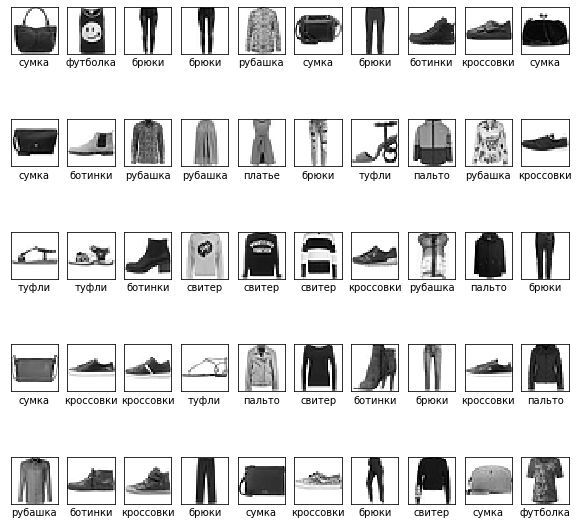

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [5]:
x_train = x_train.reshape(60000, 784)

In [6]:

x_train = x_train / 255 

In [7]:
print(y_train[0])

9


In [8]:
y_train = utils.to_categorical(y_train, 10)

In [9]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:

model = Sequential()

model.add(Dense(800, input_dim=784, activation="relu"))

model.add(Dense(10, activation="softmax"))

In [11]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучение

In [12]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=100,  
                    verbose=1)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 108us/sample - loss: 1.1171 - accuracy: 0.6737 - loss: 1.1199 - accuracy: 0.67
Epoch 2/100
60000/60000 [==============================] - 5s 91us/sample - loss: 0.7227 - accuracy: 0.7741
Epoch 3/100
60000/60000 [==============================] - 6s 97us/sample - loss: 0.6334 - accuracy: 0.7997s - loss: 0.6453 - 
Epoch 4/100
60000/60000 [==============================] - 5s 85us/sample - loss: 0.5848 - accuracy: 0.8124
Epoch 5/100
60000/60000 [==============================] - 5s 82us/sample - loss: 0.5535 - accuracy: 0.8202s - loss: 0.5585 - ac
Epoch 6/100
60000/60000 [==============================] - 5s 85us/sample - loss: 0.5307 - accuracy: 0.8258
Epoch 7/100
60000/60000 [==============================] - 5s 81us/sample - loss: 0.5132 - accuracy: 0.8303s
Epoch 8/100
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4994 - accuracy: 0.8339
Epoch 9/100
60000/60000 [==============

60000/60000 [==============================] - 4s 72us/sample - loss: 0.3296 - accuracy: 0.8860
Epoch 75/100
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3284 - accuracy: 0.8870
Epoch 76/100
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3270 - accuracy: 0.8864
Epoch 77/100
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3261 - accuracy: 0.8874
Epoch 78/100
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3255 - accuracy: 0.8867
Epoch 79/100
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3242 - accuracy: 0.8867
Epoch 80/100
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3231 - accuracy: 0.8884
Epoch 81/100
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3224 - accuracy: 0.8881
Epoch 82/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3213 - accuracy: 0.8880
Epoch 83/100
60000/60000 [======

In [13]:
predictions = model.predict(x_train)

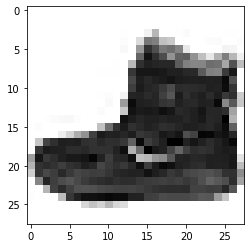

In [14]:

n = 0
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [15]:
print(predictions[n])

[7.6657418e-09 4.0631359e-10 2.1254853e-10 1.3427205e-09 3.9336370e-10
 2.0545683e-04 5.9986249e-08 6.5874530e-04 3.4642862e-06 9.9913234e-01]


In [16]:
np.argmax(predictions[n])

9

Печатаем название класса

In [17]:
classes[np.argmax(predictions[n])]

'ботинки'

In [18]:
np.argmax(y_train[n])

9

In [19]:
classes[np.argmax(y_train[n])]

'ботинки'